In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import rpy2.rinterface
import seaborn as sb

In [2]:
%load_ext rpy2.ipython

In [3]:
pd.set_option('display.max_columns', 500)

In [77]:
table = pd.read_csv('./clinical1.csv')

In [78]:
table.head()

,PATIENT_ID,SEX,RACE,ETHNICITY,AGE,AGE_IN_DAYS,WBC,CNS_STATUS,TESTICULAR_INVOLVEMENT,MRD_PERCENT_DAY_8,MRD_PERCENT_DAY_8_SENSITIVITY,MRD_PERCENT_DAY_29,MRD_PERCENT_DAY_29_SENSITIVITY,MRD_PERCENT_DAY_43,MRD_PERCENT_DAY_43_SENSITIVITY,MRD_END_CONSOLIDATION,MRD_END_CONSOLIDATION_SENSITIVITY,FIRST_EVENT,DAYS_TO_EVENT,OS_STATUS,OS_DAYS,OS_MONTHS,DAYS_TO_DEATH,BM_DAY_8,BM_DAY_15,BM_DAY_29,BM_DAY_43,KARYOTYPE,CONGENITAL_ABNORMALITY,PROTOCOL,ALTERNATE_THERAPY,ALTERNATE_THERAPY_OTHER,SAMPLE_ID,BONE_MARROW_SITE_OF_RELAPSE,CNS_SITE_OF_RELAPSE,TESTES_SITE_OF_RELAPSE,OTHER_SITE_OF_RELAPSE,ETV6_RUNX1_FUSION_STATUS,TRISOMY_4_10,MLL_STATUS,BCR_ABL1_STATUS,TCF3_PBX1_STATUS,DNA_INDEX,CELL_OF_ORIGIN,MOLECULAR_SUBTYPE,ONCOTREE_CODE,ANALYSIS_COHORT,CANCER_TYPE,CANCER_TYPE_DETAILED
0,TARGET-10-PANBXW,Female,White,Not Hispanic or Latino,8.0,2872.0,117.0,CNS 1,Not applicable,NaN,NaN,0.03,0.01,NaN,NaN,NaN,NaN,Relapse,1764.0,DECEASED,3464.0,114.0,NaN,1.0,NaN,1.0,NaN,"46,XX,t(1;17)(q42;q25),-2,add(16)(q22),+r[3]/4...",No,AALL0232,NaN,NaN,TARGET-10-PANBXW-09,Yes,No,No,No,Positive,Negative,Negative,Negative,Negative,1,B-Precursor,ETV6-RUNX1,BLL,DISCOVERY,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma
1,TARGET-10-PANCVR,Male,White,Hispanic or Latino,7.0,2329.0,209.2,CNS 2,No,NaN,NaN,0.03,0.01,NaN,NaN,NaN,NaN,Relapse,285.0,DECEASED,473.0,16.0,473.0,96.0,4.0,0.0,NaN,"46,XY,t(5;9)(q21;q34)[16]",No,AALL0232,NaN,NaN,TARGET-10-PANCVR-03,Yes,Yes,No,Yes,Negative,Negative,Negative,Negative,Negative,1,B-Precursor,None of the above,BLL,DISCOVERY,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma
2,TARGET-10-PANCVR,Male,White,Hispanic or Latino,7.0,2329.0,209.2,CNS 2,No,NaN,NaN,0.03,0.01,NaN,NaN,NaN,NaN,Relapse,285.0,DECEASED,473.0,16.0,473.0,96.0,4.0,0.0,NaN,"46,XY,t(5;9)(q21;q34)[16]",No,AALL0232,NaN,NaN,TARGET-10-PANCVR-04,Yes,Yes,No,Yes,Negative,Negative,Negative,Negative,Negative,1,B-Precursor,None of the above,BLL,DISCOVERY,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma
3,TARGET-10-PANCVR,Male,White,Hispanic or Latino,7.0,2329.0,209.2,CNS 2,No,NaN,NaN,0.03,0.01,NaN,NaN,NaN,NaN,Relapse,285.0,DECEASED,473.0,16.0,473.0,96.0,4.0,0.0,NaN,"46,XY,t(5;9)(q21;q34)[16]",No,AALL0232,NaN,NaN,TARGET-10-PANCVR-09,Yes,Yes,No,Yes,Negative,Negative,Negative,Negative,Negative,1,B-Precursor,None of the above,BLL,DISCOVERY,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma
4,TARGET-10-PANDCF,Male,White,Hispanic or Latino,8.0,2683.0,250.7,CNS 1,No,NaN,NaN,0.00,0.01,NaN,NaN,NaN,NaN,Relapse,908.0,DECEASED,1069.0,36.0,1069.0,78.0,80.0,0.0,NaN,"52,XY,+X,+5,+6,+11,+13,+22[25]",No,AALL0232,NaN,NaN,TARGET-10-PANDCF-03,Yes,No,No,No,Negative,Negative,Negative,Negative,Negative,1.16,B-Precursor,Hyperdiploidy without trisomy of both chromsom...,BLL,DISCOVERY,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma


In [79]:
mirna = pd.read_csv('./data_expression_miRNA.txt', sep = '\t', header=None)

In [80]:
mirna.index = mirna.iloc[:,0]

In [81]:
mirna_t = mirna.T[1:]

In [82]:
mirna_t.head()

,Hugo_Symbol,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,hsa-mir-1471,hsa-mir-147a,hsa-mir-147b,hsa-mir-148a,hsa-mir-148b,hsa-mir-149,hsa-mir-150,hsa-mir-151a,hsa-mir-151b,hsa-mir-152,hsa-mir-153-1,hsa-mir-153-2,hsa-mir-1537,hsa-mir-1538,hsa-mir-1539,hsa-mir-154,hsa-mir-155,hsa-mir-1587,hsa-mir-15a,hsa-mir-15b,hsa-mir-16-1,hsa-mir-16-2,hsa-mir-17,hsa-mir-181a-1,hsa-mir-181a-2,hsa-mir-181b-1,hsa-mir-181b-2,hsa-mir-181c,hsa-mir-181d,hsa-mir-182,hsa-mir-1825,hsa-mir-1827,hsa-mir-183,hsa-mir-184,hsa-mir-185,hsa-mir-186,hsa-mir-187,hsa-mir-188,hsa-mir-18a,hsa-mir-18b,hsa-mir-1908,hsa-mir-1909,hsa-mir-190a,hsa-mir-190b,hsa-mir-191,hsa-mir-1910,hsa-mir-1911,hsa-mir-1912,hsa-mir-1913,hsa-mir-1914,hsa-mir-1915,hsa-mir-192,hsa-mir-193a,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-6823,hsa-mir-6824,hsa-mir-6825,hsa-mir-6826,hsa-mir-6827,hsa-mir-6828,hsa-mir-6829,hsa-mir-6830,hsa-mir-6831,hsa-mir-6832,hsa-mir-6833,hsa-mir-6834,hsa-mir-6835,hsa-mir-6836,hsa-mir-6837,hsa-mir-6838,hsa-mir-6839,hsa-mir-6840,hsa-mir-6841,hsa-mir-6842,hsa-mir-6843,hsa-mir-6844,hsa-mir-6845,hsa-mir-6846,hsa-mir-6847,hsa-mir-6848,hsa-mir-6849,hsa-mir-6850,hsa-mir-6851,hsa-mir-6852,hsa-mir-6853,hsa-mir-6854,hsa-mir-6855,hsa-m

In [83]:
table = pd.merge(table, mirna_t, left_on = 'SAMPLE_ID', right_on = 'Hugo_Symbol')

In [84]:
table.head()

,PATIENT_ID,SEX,RACE,ETHNICITY,AGE,AGE_IN_DAYS,WBC,CNS_STATUS,TESTICULAR_INVOLVEMENT,MRD_PERCENT_DAY_8,MRD_PERCENT_DAY_8_SENSITIVITY,MRD_PERCENT_DAY_29,MRD_PERCENT_DAY_29_SENSITIVITY,MRD_PERCENT_DAY_43,MRD_PERCENT_DAY_43_SENSITIVITY,MRD_END_CONSOLIDATION,MRD_END_CONSOLIDATION_SENSITIVITY,FIRST_EVENT,DAYS_TO_EVENT,OS_STATUS,OS_DAYS,OS_MONTHS,DAYS_TO_DEATH,BM_DAY_8,BM_DAY_15,BM_DAY_29,BM_DAY_43,KARYOTYPE,CONGENITAL_ABNORMALITY,PROTOCOL,ALTERNATE_THERAPY,ALTERNATE_THERAPY_OTHER,SAMPLE_ID,BONE_MARROW_SITE_OF_RELAPSE,CNS_SITE_OF_RELAPSE,TESTES_SITE_OF_RELAPSE,OTHER_SITE_OF_RELAPSE,ETV6_RUNX1_FUSION_STATUS,TRISOMY_4_10,MLL_STATUS,BCR_ABL1_STATUS,TCF3_PBX1_STATUS,DNA_INDEX,CELL_OF_ORIGIN,MOLECULAR_SUBTYPE,ONCOTREE_CODE,ANALYSIS_COHORT,CANCER_TYPE,CANCER_TYPE_DETAILED,Hugo_Symbol,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,hsa-mir-1471,hsa-mir-147a,hsa-mir-147b,hsa-mir-148a,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-6823,hsa-mir-6824,hsa-mir-6825,hsa-mir-6826,hsa-mir-6827,hsa-mir-6828,hsa-mir-6829,hsa-mir-6830,hsa-mir-6831,hsa-mir-6832,hsa-mir-6833,hsa-mir-6834,hsa-mir-6835,hsa-mir-6836,hsa-mir-6837,hsa-mir-6838,hsa-mir-6839,hsa-mir-6840,hsa-mir-6841,hsa-mir-6842,hsa-mir-6843,hsa-mir-6844,hsa-m

In [85]:
table.to_csv('./clinical_2.csv')

In [86]:
table = pd.read_csv('./clinical_2.csv')

In [87]:
table.head()

,Unnamed: 0,PATIENT_ID,SEX,RACE,ETHNICITY,AGE,AGE_IN_DAYS,WBC,CNS_STATUS,TESTICULAR_INVOLVEMENT,MRD_PERCENT_DAY_8,MRD_PERCENT_DAY_8_SENSITIVITY,MRD_PERCENT_DAY_29,MRD_PERCENT_DAY_29_SENSITIVITY,MRD_PERCENT_DAY_43,MRD_PERCENT_DAY_43_SENSITIVITY,MRD_END_CONSOLIDATION,MRD_END_CONSOLIDATION_SENSITIVITY,FIRST_EVENT,DAYS_TO_EVENT,OS_STATUS,OS_DAYS,OS_MONTHS,DAYS_TO_DEATH,BM_DAY_8,BM_DAY_15,BM_DAY_29,BM_DAY_43,KARYOTYPE,CONGENITAL_ABNORMALITY,PROTOCOL,ALTERNATE_THERAPY,ALTERNATE_THERAPY_OTHER,SAMPLE_ID,BONE_MARROW_SITE_OF_RELAPSE,CNS_SITE_OF_RELAPSE,TESTES_SITE_OF_RELAPSE,OTHER_SITE_OF_RELAPSE,ETV6_RUNX1_FUSION_STATUS,TRISOMY_4_10,MLL_STATUS,BCR_ABL1_STATUS,TCF3_PBX1_STATUS,DNA_INDEX,CELL_OF_ORIGIN,MOLECULAR_SUBTYPE,ONCOTREE_CODE,ANALYSIS_COHORT,CANCER_TYPE,CANCER_TYPE_DETAILED,Hugo_Symbol,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,hsa-mir-1471,hsa-mir-147a,hsa-mir-147b,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-6823,hsa-mir-6824,hsa-mir-6825,hsa-mir-6826,hsa-mir-6827,hsa-mir-6828,hsa-mir-6829,hsa-mir-6830,hsa-mir-6831,hsa-mir-6832,hsa-mir-6833,hsa-mir-6834,hsa-mir-6835,hsa-mir-6836,hsa-mir-6837,hsa-mir-6838,hsa-mir-6839,hsa-mir-6840,hsa-mir-6841,hsa-mir-6842,hsa-mir-6843,hsa-mir-6844,hsa-mir

In [88]:
mirna_t.shape

(181, 1871)

In [89]:
table.shape

(181, 1921)

In [33]:
###table.iloc[:,54:]

In [34]:
#MRD Day 29
m = table['ETV6-RUNX1 Fusion Status'] == 'Positive'
mx = table['ETV6-RUNX1 Fusion Status'] == 'Negative'
t = table['Trisomy 4_10'] == 'Positive'
mll = table['MLL Status'] == 'Positive'
tcf = table['TCF3-PBX1 Status'] == 'Positive'
bcr = table['BCR ABL1 Status'] == 'Positive'

m2 = table['Diagnosis Age (days)'] <= 3650

rx = table['First Event'] == 'None'
r1 = table['Bone Marrow Site of Relapse'] == 'Yes'
r2 = table['CNS Site of Relapse'] == 'Yes'
r3 = table['Testes Site of Relapse'] == 'Yes'
r4 = table['Other Site of Relapse'] == 'Yes'
rm = table['First Event'] == 'Relapse'
rs = table['First Event'] == 'SMN'
rp = table['First Event'] == 'Progression'

In [35]:
temp = table[m].iloc[:,55:]

In [36]:
temp_rm = table[m][rm].iloc[:,55:]

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [37]:
temp_Nrm = table[m][-rm].iloc[:,55:]

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [38]:
table[m]['First Event'].unique()

array(['Relapse'], dtype=object)

In [39]:
temp2 = table[mx].iloc[:,55:]

In [40]:
temp.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,hsa-mir-1471,hsa-mir-147a,hsa-mir-147b,hsa-mir-148a,hsa-mir-148b,hsa-mir-149,hsa-mir-150,hsa-mir-151a,hsa-mir-151b,hsa-mir-152,hsa-mir-153-1,hsa-mir-153-2,hsa-mir-1537,hsa-mir-1538,hsa-mir-1539,hsa-mir-154,hsa-mir-155,hsa-mir-1587,hsa-mir-15a,hsa-mir-15b,hsa-mir-16-1,hsa-mir-16-2,hsa-mir-17,hsa-mir-181a-1,hsa-mir-181a-2,hsa-mir-181b-1,hsa-mir-181b-2,hsa-mir-181c,hsa-mir-181d,hsa-mir-182,hsa-mir-1825,hsa-mir-1827,hsa-mir-183,hsa-mir-184,hsa-mir-185,hsa-mir-186,hsa-mir-187,hsa-mir-188,hsa-mir-18a,hsa-mir-18b,hsa-mir-1908,hsa-mir-1909,hsa-mir-190a,hsa-mir-190b,hsa-mir-191,hsa-mir-1910,hsa-mir-1911,hsa-mir-1912,hsa-mir-1913,hsa-mir-1914,hsa-mir-1915,hsa-mir-192,hsa-mir-193a,hsa-mir-193b,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-6823,hsa-mir-6824,hsa-mir-6825,hsa-mir-6826,hsa-mir-6827,hsa-mir-6828,hsa-mir-6829,hsa-mir-6830,hsa-mir-6831,hsa-mir-6832,hsa-mir-6833,hsa-mir-6834,hsa-mir-6835,hsa-mir-6836,hsa-mir-6837,hsa-mir-6838,hsa-mir-6839,hsa-mir-6840,hsa-mir-6841,hsa-mir-6842,hsa-mir-6843,hsa-mir-6844,hsa-mir-6845,hsa-mir-6846,hsa-mir-6847,hsa-mir-6848,hsa-mir-6849,hsa-mir-6850,hsa-mir-6851,hsa-mir-6852,hsa-mir-6853,hsa-mir-6854,hsa-mir-6855,hsa-

In [41]:
temp2.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,hsa-mir-1471,hsa-mir-147a,hsa-mir-147b,hsa-mir-148a,hsa-mir-148b,hsa-mir-149,hsa-mir-150,hsa-mir-151a,hsa-mir-151b,hsa-mir-152,hsa-mir-153-1,hsa-mir-153-2,hsa-mir-1537,hsa-mir-1538,hsa-mir-1539,hsa-mir-154,hsa-mir-155,hsa-mir-1587,hsa-mir-15a,hsa-mir-15b,hsa-mir-16-1,hsa-mir-16-2,hsa-mir-17,hsa-mir-181a-1,hsa-mir-181a-2,hsa-mir-181b-1,hsa-mir-181b-2,hsa-mir-181c,hsa-mir-181d,hsa-mir-182,hsa-mir-1825,hsa-mir-1827,hsa-mir-183,hsa-mir-184,hsa-mir-185,hsa-mir-186,hsa-mir-187,hsa-mir-188,hsa-mir-18a,hsa-mir-18b,hsa-mir-1908,hsa-mir-1909,hsa-mir-190a,hsa-mir-190b,hsa-mir-191,hsa-mir-1910,hsa-mir-1911,hsa-mir-1912,hsa-mir-1913,hsa-mir-1914,hsa-mir-1915,hsa-mir-192,hsa-mir-193a,hsa-mir-193b,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-6823,hsa-mir-6824,hsa-mir-6825,hsa-mir-6826,hsa-mir-6827,hsa-mir-6828,hsa-mir-6829,hsa-mir-6830,hsa-mir-6831,hsa-mir-6832,hsa-mir-6833,hsa-mir-6834,hsa-mir-6835,hsa-mir-6836,hsa-mir-6837,hsa-mir-6838,hsa-mir-6839,hsa-mir-6840,hsa-mir-6841,hsa-mir-6842,hsa-mir-6843,hsa-mir-6844,hsa-mir-6845,hsa-mir-6846,hsa-mir-6847,hsa-mir-6848,hsa-mir-6849,hsa-mir-6850,hsa-mir-6851,hsa-mir-6852,hsa-mir-6853,hsa-mir-6854,hsa-mir-6855,hsa-

In [42]:
temp.min().min()

0.0

In [43]:
temp.max().max()

202044.726988

In [44]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

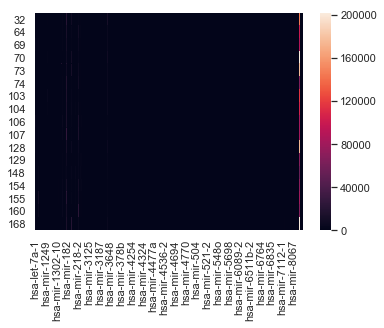

In [45]:
sb.heatmap(temp)

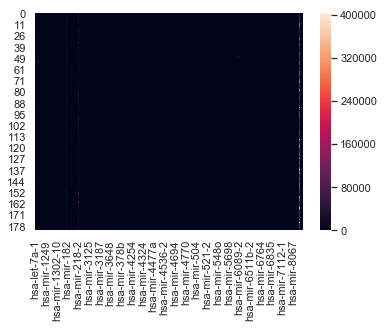

In [46]:
sb.heatmap(temp2)

In [47]:
import numpy as np

In [48]:
temp_log = np.log(temp+0.00001)

In [49]:
temp_log.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,hsa-mir-1471,hsa-mir-147a,hsa-mir-147b,hsa-mir-148a,hsa-mir-148b,hsa-mir-149,hsa-mir-150,hsa-mir-151a,hsa-mir-151b,hsa-mir-152,hsa-mir-153-1,hsa-mir-153-2,hsa-mir-1537,hsa-mir-1538,hsa-mir-1539,hsa-mir-154,hsa-mir-155,hsa-mir-1587,hsa-mir-15a,hsa-mir-15b,hsa-mir-16-1,hsa-mir-16-2,hsa-mir-17,hsa-mir-181a-1,hsa-mir-181a-2,hsa-mir-181b-1,hsa-mir-181b-2,hsa-mir-181c,hsa-mir-181d,hsa-mir-182,hsa-mir-1825,hsa-mir-1827,hsa-mir-183,hsa-mir-184,hsa-mir-185,hsa-mir-186,hsa-mir-187,hsa-mir-188,hsa-mir-18a,hsa-mir-18b,hsa-mir-1908,hsa-mir-1909,hsa-mir-190a,hsa-mir-190b,hsa-mir-191,hsa-mir-1910,hsa-mir-1911,hsa-mir-1912,hsa-mir-1913,hsa-mir-1914,hsa-mir-1915,hsa-mir-192,hsa-mir-193a,hsa-mir-193b,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-6823,hsa-mir-6824,hsa-mir-6825,hsa-mir-6826,hsa-mir-6827,hsa-mir-6828,hsa-mir-6829,hsa-mir-6830,hsa-mir-6831,hsa-mir-6832,hsa-mir-6833,hsa-mir-6834,hsa-mir-6835,hsa-mir-6836,hsa-mir-6837,hsa-mir-6838,hsa-mir-6839,hsa-mir-6840,hsa-mir-6841,hsa-mir-6842,hsa-mir-6843,hsa-mir-6844,hsa-mir-6845,hsa-mir-6846,hsa-mir-6847,hsa-mir-6848,hsa-mir-6849,hsa-mir-6850,hsa-mir-6851,hsa-mir-6852,hsa-mir-6853,hsa-mir-6854,hsa-mir-6855,hsa-

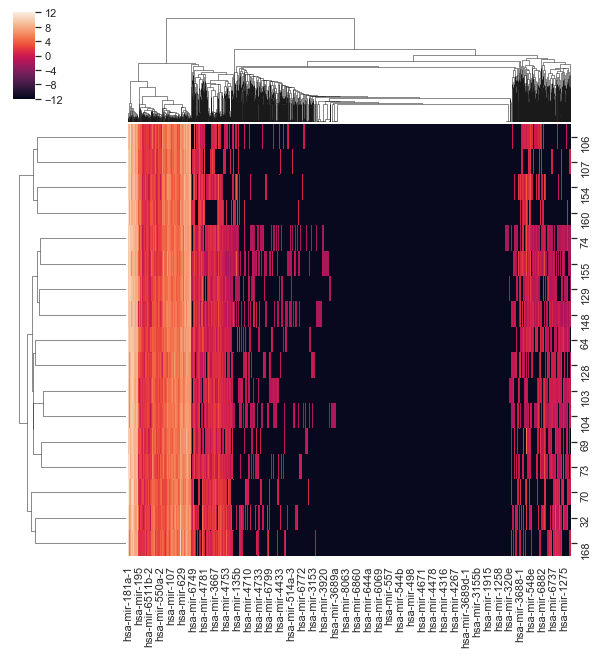

In [50]:
sb.clustermap(temp_log, vmin = -12, vmax = 12)

In [51]:
temp2_log = np.log(temp2+0.00001)

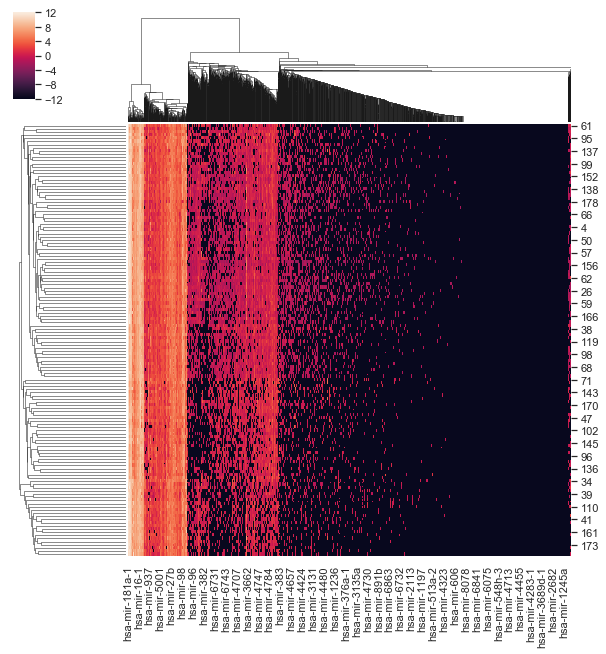

In [52]:
sb.clustermap(temp2_log, vmin = -12, vmax = 12)

In [53]:
temp_rm_log = np.log(temp_rm+0.00001)
temp_rx_log = np.log(temp_rx+0.00001)

NameError: name 'temp_rx' is not defined

In [ ]:
sb.clustermap(temp_rm_log, vmin = -12, vmax = 12)